# Prototype of projection the EIOPA curve n-years year ahead and recalibrating the Smith Wilson algorithm to the new curve

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from ImportData import import_SWEiopa
from CurvesClass import Curves

## Import Param file

In [3]:
paramfile = pd.read_csv("Input\Parameters.csv")
paramfile.index = paramfile["Parameter"]
del paramfile["Parameter"]

## Read base EIOPA curve from file

In [4]:
selected_param_file = paramfile.loc["EIOPA_param_file"][0]
selected_curves_file = paramfile.loc["EIOPA_curves_file"][0]
country = paramfile.loc["country"][0]

[maturities_country, curve_country, extra_param, Qb]= import_SWEiopa(selected_param_file, selected_curves_file, country)

## Initiate Curve object

In [5]:
# ultimate forward rate
ufr = extra_param["UFR"]/100
# Numeric precision of the optimisation
Precision = float(paramfile.loc["Precision"][0])

# Targeted distance between the extrapolated curve and the ultimate forward rate at the convergence point
Tau = float(paramfile.loc["Tau"][0])# 1 basis point

MD = paramfile.loc["Modelling_Date"]

In [6]:
Curves = Curves(ufr, Precision, Tau, MD, country)

In [7]:
#Curves.m_obs = pd.DataFrame(data=range(1,curve_country.size+1),index=None, columns=["Maturity"])
#Curves.r_obs = pd.DataFrame(data=curve_country.values, index=None, columns=["Yield"])

In [8]:
Curves.SetObservedTermStructure(maturity_vec=range(1,curve_country.size+1), yield_vec=curve_country.values)

In [9]:
ProjYear = 0
# Number of projection years
N = int(paramfile.loc["n_proj_years"][0])

### Calculate 1 year forward rates

The forward rates will be used to calculate forward spot curves

In [10]:
#fwdata = ((Curves.r_obs["Yield"]+1) ** Curves.m_obs["Maturity"])/((Curves.r_obs["Yield"].shift(periods=1)+1) ** Curves.m_obs["Maturity"].shift(periods=1))
#Curves.fwd_rates = pd.DataFrame(data=fwdata.values, index=None, columns=["Forward"])

In [11]:
Curves.CalcFwdRates()

In [12]:
display(Curves.fwd_rates)

,Forward
0,NaN
1,1.031582
2,1.027909
3,1.026170
4,1.026146
...,...
145,1.034191
146,1.034211
147,1.034231
148,1.034251


### Forward spot rates

$$
y_i(t-i) = \prod_i^t\big(1+fw_{EIOPA}(t)\big)^{\frac{1}{t-i}}
$$

In [13]:
for year in range(1,N):
    spot = ((1+Curves.fwd_rates["Forward"][year:]).cumprod(axis=None)**(1/(Curves.m_obs["Maturity"]-year))-1)[year:]-1
    Curves.r_obs=Curves.r_obs.join(pd.Series(data=spot.values, index=None, name="Yield year"+str(year)))

In [14]:
display(Curves.r_obs)

,Yield,Yield year1,Yield year2,Yield year3,Yield year4,Yield year5,Yield year6,Yield year7,Yield year8,Yield year9,...,Yield year40,Yield year41,Yield year42,Yield year43,Yield year44,Yield year45,Yield year46,Yield year47,Yield year48,Yield year49
0,0.03472,0.031582,0.027909,0.026170,0.026146,0.026663,0.027041,0.027560,0.028290,0.028950,...,0.033653,0.033492,0.033733,0.033531,0.034204,0.033982,0.033731,0.033931,0.034131,0.034332
1,0.03315,0.029745,0.027039,0.026158,0.026404,0.026852,0.027301,0.027925,0.028620,0.028010,...,0.033573,0.033612,0.033632,0.033867,0.034093,0.033856,0.033831,0.034031,0.034232,0.034176
2,0.03140,0.028552,0.026741,0.026326,0.026617,0.027088,0.027631,0.028267,0.028104,0.029452,...,0.033626,0.033585,0.033823,0.033906,0.033972,0.033881,0.033931,0.034131,0.034161,0.034184
3,0.03009,0.027951,0.026722,0.026505,0.026853,0.027389,0.027960,0.027968,0.029161,0.029882,...,0.033602,0.033740,0.033862,0.033862,0.033962,0.033944,0.034031,0.034104,0.034171,0.034233
4,0.02930,0.027693,0.026786,0.026716,0.027140,0.027701,0.027782,0.028841,0.029563,0.029543,...,0.033723,0.033788,0.033836,0.033876,0.033996,0.034021,0.034029,0.034123,0.034213,0.034299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.03274,0.032739,0.032757,0.032801,0.032856,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,0.03275,0.032749,0.032768,0.032811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,0.03276,0.032760,0.032778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0.03277,0.032770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Calculate the alpha parameter

Calibration of the alpha parameter for the base curve using the bisection algorithm.

In [15]:
alphaoptimized = [Curves.BisectionAlpha(0.05, 0.5, Curves.m_obs["Maturity"], Curves.r_obs["Yield"], Curves.ufr, Curves.tau, Curves.precision, 1000)]
if "Yield year" in Curves.alpha.columns:
    Curves.alpha["Yield year"] = alphaoptimized
else:
    Curves.alpha = Curves.alpha.join(pd.Series(data=None, index=None, name="Yield year",dtype='float64'))
    Curves.alpha["Yield year"] = alphaoptimized

### Calibrate first calibration vector b

In [16]:
bCalibrated = Curves.SWCalibrate(Curves.r_obs["Yield"], Curves.m_obs["Maturity"], Curves.ufr, Curves.alpha["Yield year"][0])
bCalibrated = np.append(bCalibrated,np.repeat(np.nan, ProjYear))

In [17]:
if "Yield year" in Curves.b.columns:
    Curves.b["Yield year"] = bCalibrated
else:
    Curves.b = Curves.b.join(pd.Series(data= None,index=None, name="Yield year",dtype='float64'))
    Curves.b["Yield year"] = bCalibrated

## Calibrate every yield curve

### Parameters that stay the same

### Calibrate time 0 curve

#### Calculated implied observations for the first year of projection

In [18]:
ProjYear = 1
NameOfYear = "Yield year"+str(ProjYear)

In [19]:
r_obs = np.transpose(np.array(Curves.r_obs[NameOfYear]))[:-ProjYear]

#### Calculated implied maturities for the first year of projection

In [20]:
m_obs = np.transpose(np.array(range(1,r_obs.size+1)))

#### Calibrate

In [21]:
alphaoptimized = [Curves.BisectionAlpha(0.05, 0.5, m_obs, r_obs, Curves.ufr, Curves.tau, Curves.precision, 1000)]

In [22]:
if NameOfYear in Curves.alpha.columns:
    Curves.alpha[NameOfYear] = alphaoptimized
else:
    Curves.alpha = Curves.alpha.join(pd.Series(data=None, index=None, name=NameOfYear,dtype='float64'))
    Curves.alpha[NameOfYear] = alphaoptimized

In [23]:
bCalibrated = Curves.SWCalibrate(r_obs, m_obs, Curves.ufr, Curves.alpha[NameOfYear][0])
bCalibrated = np.append(bCalibrated,np.repeat(np.nan,ProjYear))

In [24]:
if NameOfYear in Curves.b.columns:
    Curves.b[NameOfYear] = bCalibrated
else:
    Curves.b = Curves.b.join(pd.Series(data= None,index=None, name=NameOfYear,dtype='float64'))
    Curves.b[NameOfYear] = bCalibrated

In [25]:
Curves.b[NameOfYear][:-1]

0     -0.080601
1      0.015151
2      0.007984
3      0.010251
4     -0.007252
         ...   
144    6.988021
145   -1.911537
146    0.574049
147   -0.314029
148    0.266142
Name: Yield year1, Length: 149, dtype: float64

In [26]:
r_Obs_Est = Curves.SWExtrapolate(m_obs, m_obs, Curves.b[NameOfYear][:-1], Curves.ufr, Curves.alpha[NameOfYear][0])

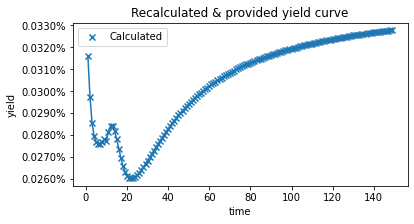

In [27]:
fig, ax1 = plt.subplots(1,1)
ax1.scatter(m_obs, r_obs, label="Calculated",marker="x")
ax1.plot(m_obs, r_Obs_Est)
ax1.set_ylabel("yield")
ax1.set_title('Recalculated & provided yield curve')
ax1.set_xlabel("time")
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_figwidth(6)
fig.set_figheight(3)
plt.show()

# Repeat for all

In [28]:
for iYear in range(2,50):
    ProjYear = iYear
    NameOfYear = "Yield year"+str(ProjYear)
    r_Obs = np.transpose(np.array(Curves.r_obs[NameOfYear]))[:-ProjYear]
    M_Obs = np.transpose(np.array(range(1,r_Obs.size+1)))
    alphaoptimized = [Curves.BisectionAlpha(0.05, 0.5, M_Obs, r_Obs, Curves.ufr, Curves.tau, Curves.precision, 1000)]
    if NameOfYear in Curves.alpha.columns:
        Curves.alpha[NameOfYear] = alphaoptimized
    else:
        Curves.alpha = Curves.alpha.join(pd.Series(data=None, index=None, name=NameOfYear,dtype='float64'))
        Curves.alpha[NameOfYear] = alphaoptimized
    bCalibrated = Curves.SWCalibrate(r_Obs, M_Obs, Curves.ufr, Curves.alpha[NameOfYear][0])
    bCalibrated = np.append(bCalibrated,np.repeat(np.nan,ProjYear))
    if NameOfYear in Curves.b.columns:
        Curves.b[NameOfYear] = bCalibrated
    else:
        Curves.b = Curves.b.join(pd.Series(data= None,index=None, name=NameOfYear,dtype='float64'))
        Curves.b[NameOfYear] = bCalibrated
    r_Obs_Est = Curves.SWExtrapolate(M_Obs, M_Obs, Curves.b[NameOfYear][:-(ProjYear)], Curves.ufr, Curves.alpha[NameOfYear][0])

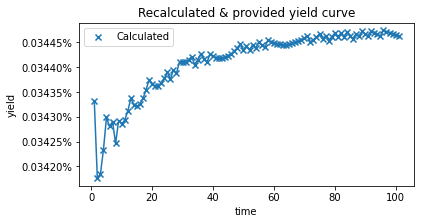

In [29]:
fig, ax1 = plt.subplots(1,1)
ax1.scatter(M_Obs, r_Obs, label="Calculated",marker="x")
ax1.plot(M_Obs, r_Obs_Est)
ax1.set_ylabel("yield")
ax1.set_title('Recalculated & provided yield curve')
ax1.set_xlabel("time")
ax1.legend()
ax1.yaxis.set_major_formatter(mtick.PercentFormatter())
fig.set_figwidth(6)
fig.set_figheight(3)
plt.show()

### Saving calibrated results

In [30]:
Curves.b.to_csv("Intermediate/b.csv")

In [31]:
Curves.alpha.to_csv("Intermediate/alpha.csv")

In [32]:
Curves.r_obs

,Yield,Yield year1,Yield year2,Yield year3,Yield year4,Yield year5,Yield year6,Yield year7,Yield year8,Yield year9,...,Yield year40,Yield year41,Yield year42,Yield year43,Yield year44,Yield year45,Yield year46,Yield year47,Yield year48,Yield year49
0,0.03472,0.031582,0.027909,0.026170,0.026146,0.026663,0.027041,0.027560,0.028290,0.028950,...,0.033653,0.033492,0.033733,0.033531,0.034204,0.033982,0.033731,0.033931,0.034131,0.034332
1,0.03315,0.029745,0.027039,0.026158,0.026404,0.026852,0.027301,0.027925,0.028620,0.028010,...,0.033573,0.033612,0.033632,0.033867,0.034093,0.033856,0.033831,0.034031,0.034232,0.034176
2,0.03140,0.028552,0.026741,0.026326,0.026617,0.027088,0.027631,0.028267,0.028104,0.029452,...,0.033626,0.033585,0.033823,0.033906,0.033972,0.033881,0.033931,0.034131,0.034161,0.034184
3,0.03009,0.027951,0.026722,0.026505,0.026853,0.027389,0.027960,0.027968,0.029161,0.029882,...,0.033602,0.033740,0.033862,0.033862,0.033962,0.033944,0.034031,0.034104,0.034171,0.034233
4,0.02930,0.027693,0.026786,0.026716,0.027140,0.027701,0.027782,0.028841,0.029563,0.029543,...,0.033723,0.033788,0.033836,0.033876,0.033996,0.034021,0.034029,0.034123,0.034213,0.034299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,0.03274,0.032739,0.032757,0.032801,0.032856,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
146,0.03275,0.032749,0.032768,0.032811,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,0.03276,0.032760,0.032778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,0.03277,0.032770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
Curves.m_obs.to_csv("Intermediate/M_Obs.csv")

In [34]:
Curves.fwd_rates.to_csv("Intermediate/FwdRates.csv")

In [35]:
Qb.to_csv("Intermediate/Qb_0.csv") 